In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/admin/Desktop/I am Data Scientist/ML/Model_precision/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
len(data[data['workclass']=='?']['workclass'])

2799

In [5]:
2799/48842

0.05730723557593874

In [6]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [7]:
data[data['workclass']=='?']['education'].unique()

array(['Some-college', 'HS-grad', '7th-8th', '10th', 'Masters', '9th',
       'Assoc-acdm', '11th', 'Bachelors', '5th-6th', 'Preschool',
       'Doctorate', 'Assoc-voc', 'Prof-school', '12th', '1st-4th'],
      dtype=object)

In [8]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [12]:
len(data[data['occupation']=='?']['occupation'])

2809

In [13]:
Workclass_education = data[['workclass']+['education']].groupby('workclass').count()
Workclass_education

,education
workclass,
?,2799
Federal-gov,1432
Local-gov,3136
Never-worked,10
Private,33906
Self-emp-inc,1695
Self-emp-not-inc,3862
State-gov,1981
Without-pay,21


In [14]:
W_education = data[['workclass']+['education']].groupby('education').count()
W_education

,workclass
education,
10th,1389
11th,1812
12th,657
1st-4th,247
5th-6th,509
7th-8th,955
9th,756
Assoc-acdm,1601
Assoc-voc,2061


In [15]:
filter_data = data[data['workclass']=='?']

In [16]:
filter_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K


In [17]:
W_education_f = filter_data[['workclass']+['education']].groupby('education').count()
W_education_f

,workclass
education,
10th,148
11th,178
12th,58
1st-4th,18
5th-6th,41
7th-8th,110
9th,69
Assoc-acdm,72
Assoc-voc,83


In [18]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [21]:
len(data[data['native-country']=='?']['native-country'])

857

In [22]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112710278>,
      dtype=object)

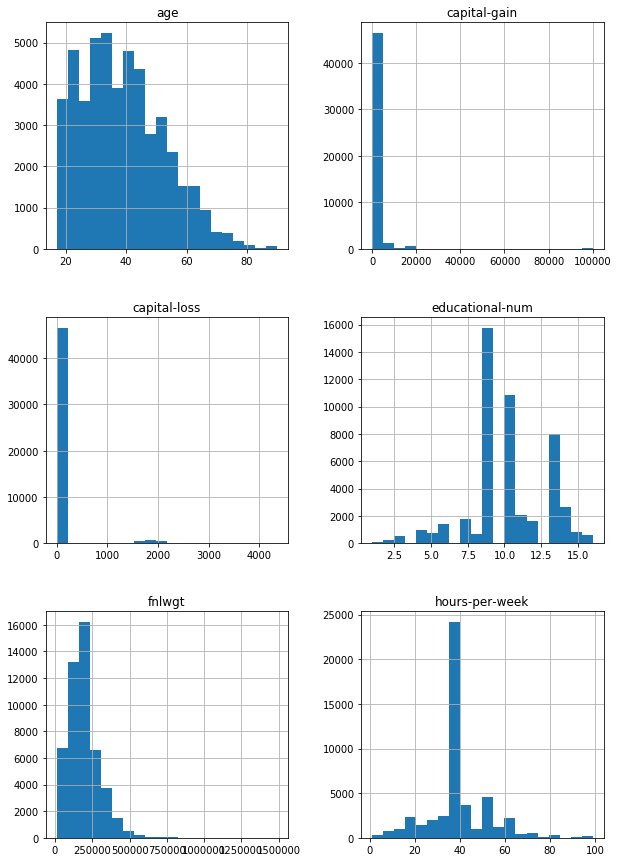

In [25]:
data.hist(bins = 20, figsize = (10, 15))

In [26]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [28]:
data_one_hot = get_one_hot(
    data,
    ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
)

In [29]:
data_one_hot.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0


In [30]:
data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 117 entries, age to native-country_Yugoslavia
dtypes: int64(6), object(9), uint8(102)
memory usage: 10.3+ MB


In [31]:
data_one_hot.drop('workclass', axis = 1, inplace = True)
data_one_hot.drop('education', axis = 1, inplace = True)
data_one_hot.drop('marital-status', axis = 1, inplace = True)
data_one_hot.drop('occupation', axis = 1, inplace = True)
data_one_hot.drop('relationship', axis = 1, inplace = True)
data_one_hot.drop('race', axis = 1, inplace = True)
data_one_hot.drop('gender', axis = 1, inplace = True)
data_one_hot.drop('native-country', axis = 1, inplace = True)

In [32]:
data_one_hot.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
data_one_hot['isMoreThan50K'] = data_one_hot.income.replace({"<=50K": 0, ">50K": 1})

In [34]:
data_one_hot.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,isMoreThan50K
0,25,226802,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,<=50K,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
data_one_hot.drop('income', axis = 1, inplace = True)

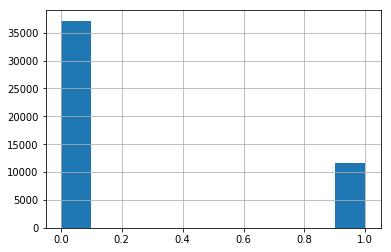

In [36]:
data_one_hot.isMoreThan50K.hist()

In [37]:
Y = data_one_hot['isMoreThan50K']

In [38]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: isMoreThan50K, dtype: int64

In [39]:
X = data_one_hot.copy()
X.drop('isMoreThan50K', axis = 1, inplace = True)

In [40]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
X.shape

(48842, 108)

In [43]:
x_train.shape

(39073, 108)

In [44]:
x_test.shape

(9769, 108)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(x_train, y_train )
y_pred = model.predict_proba( x_test )

In [48]:
y_pred[:5]

array([[0.70220804, 0.29779196],
       [0.72400418, 0.27599582],
       [0.02767084, 0.97232916],
       [0.78002072, 0.21997928],
       [0.8242678 , 0.1757322 ]])

In [49]:
zip( y_pred[:, 1], y_test)

In [50]:
model.score(x_test, y_test)

0.8038693827413246

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thres = roc_curve( y_test, y_pred[:, 1] )

In [53]:
from sklearn.metrics import auc

In [54]:
auc( fpr, tpr )

0.5805216469287222

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score( y_test, y_pred[:, 1] )

0.5805216469287222

In [58]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
Xshort = data.loc[ :, ['workclass', 'education', 'gender', 'hours-per-week', 'age'] ]
Xshort.head()

,workclass,education,gender,hours-per-week,age
0,Private,11th,Male,40,25
1,Private,HS-grad,Male,50,38
2,Local-gov,Assoc-acdm,Male,40,28
3,Private,Some-college,Male,40,44
4,?,Some-college,Female,30,18


In [72]:
datashort_onehot = get_one_hot(
    Xshort,
    ['workclass', 'education', 'gender']
)

In [73]:
datashort_onehot.head()

,workclass,education,gender,hours-per-week,age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,gender_Female,gender_Male
0,Private,11th,Male,40,25,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Private,HS-grad,Male,50,38,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,Local-gov,Assoc-acdm,Male,40,28,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Private,Some-college,Male,40,44,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,?,Some-college,Female,30,18,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [75]:
datashort_onehot.drop('workclass', axis = 1, inplace = True)
datashort_onehot.drop('education', axis = 1, inplace = True)
datashort_onehot.drop('gender', axis = 1, inplace = True)

KeyError: "['workclass'] not found in axis"

In [76]:
datashort_onehot

,education,gender,hours-per-week,age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,gender_Female,gender_Male
0,11th,Male,40,25,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,HS-grad,Male,50,38,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,Assoc-acdm,Male,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Some-college,Male,40,44,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,Some-college,Female,30,18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,10th,Male,30,34,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,HS-grad,Male,40,29,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,Prof-school,Male,32,63,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,Some-college,Female,40,24,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
9,7th-8th,Male,10,55,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
datashort_onehot.drop('education', axis = 1, inplace = True)
datashort_onehot.drop('gender', axis = 1, inplace = True)

In [78]:
model2 = LogisticRegression()

In [79]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( datashort_onehot, Y, test_size = 0.3, random_state = 0 )

In [80]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_pred2 = model2.predict_proba(X_test_short)

In [83]:
fpr2, tpr2, thres2 = roc_curve( Y_test, y_pred2[:, 1] )

In [84]:
auc( fpr, tpr )

0.5805216469287222